# Gibbs Sampling
The goal of this algorithm is to sample from a multivariate distribution, given another algorithm which samples from each dimension conditionally to the others, i.e. that you can sample $P(X_1,...,X_n)$ if you have $P(X_i \mid X_1,...X_{i-1},X_{i+1},...X_n)$ for all $i$.

We will here sample from a multivariate gaussian distribution, using [Box-Muller transform](https://www.projectrhea.org/rhea/index.php/The_principles_for_how_to_generate_random_samples_from_a_Gaussian_distribution) to sample from each conditional univariate gaussian.

Resource : https://www.youtube.com/watch?v=a_08GKWHFWo

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation
%matplotlib inline
from random import random
from IPython.display import HTML

## Create the 1D gaussian sampling

In [72]:
def sample_gaussian(mu, sigma):
    U1 = random()
    U2 = random()
    return mu + sigma * np.sqrt(-2*np.log(U2)) * np.cos(2*np.pi*U1)

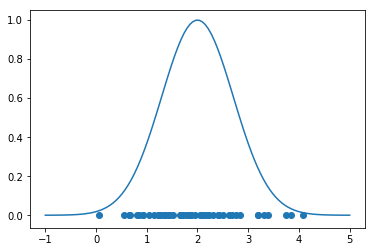

In [73]:
N, mu, sigma = 50, 2, 1
plt.scatter([sample_gaussian(mu,sigma) for i in range(N)], np.zeros((N,)))
x_vect = np.linspace(-1,5,100)
plt.plot(x_vect, np.exp(-(x_vect-mu)**2/sigma**2))

## Sample the 2D-distribution
To obtain the conditional probabilities $P(X \mid Y)$ and $P(Y \mid X)$, we used this [link](http://www.stat.wisc.edu/~mchung/teaching/stat471/lecture23.pdf)

In [173]:
rho = 0.9
mu = np.array([0,0]) # only working with (0,0) for the moment
sigma = np.array([[1,rho],[rho,1]])

In [174]:
def init():
    return scatt,line

def animate(i):
    if (i % 4 == 0):
        line.set_data([-20, 20], [y[-1], y[-1]])
    elif (i % 4 == 1):
        x.append(rho * y[-1] + np.sqrt(1-rho**2) * sample_gaussian(0, 1))
        y.append(y[-1])
        scatt.set_data(x, y)
    elif (i % 4 == 2):
        line.set_data([x[-1], x[-1]], [-20, 20])
    else:
        y.append(rho * x[-1] + np.sqrt(1-rho**2) * sample_gaussian(0, 1))
        x.append(x[-1])
        scatt.set_data(x, y)
    return scatt, line

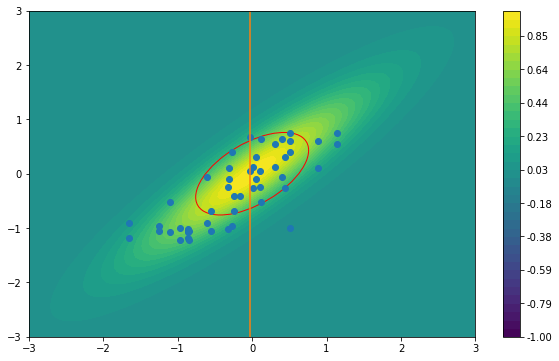

In [175]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (10, 6)
#plt.axes().set_aspect('equal', 'datalim')
    
width = 1 + rho
height = 1
angle = 45

ellipse = mpl.patches.Ellipse(xy=mu, width=width, height=height, angle=45,
                              facecolor='none', edgecolor="red")
ax = plt.gca()
ax.set_xlim(-3 + mu[0], 3 + mu[0])
ax.set_ylim(-3 + mu[0], 3 + mu[1])
ax.add_patch(ellipse)

x = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, x)
X_mu = X - mu[0]
Y_mu = Y - mu[1]
Z = np.exp(-(X_mu**2 + Y_mu**2 - 2 * rho * X_mu * Y_mu) / (2 * (1 - rho**2)))

levels = np.linspace(-1, 1, 40)

cs = ax.contourf(X, Y, Z, levels=levels)
fig.colorbar(cs, ax=ax, format="%.2f")

x = [random()*2 - 1]
y = [random()*2 - 1]
scatt, = ax.plot(x, y, "o", animated=True)
line, = ax.plot([], [], animated=True)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=1000, blit=True)
HTML(anim.to_html5_video())